#### This Notebook will <li> defines a function to create and save a wordcloud <li> create a dataframe of unique comments <li> display and save the wordcloud 

In [30]:
## import packages
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import sys
from os import path

To create the word cloud utilizing a cloud shape, a mask will be used. The png image of a cloud is stored locally as 'cloud.png'.

In [14]:
# get path to png cloud shape directory
currdir = %pwd

Define a function to get the mask, access the Stopwords and create illustration and save to a file.

In [31]:
def create_wordcloud(text):
    '''Access the mask (png),
    access the Stopwords
    create the object and save to a file.'''
    
    # create numpy array for wordcloud mask image
    mask = np.array(Image.open(path.join(currdir, "cloud.png")))

    # create set of stopwords
    stopwords = set(STOPWORDS)

    # create wordcloud object
    wc = WordCloud(background_color="white",
                    max_words=200, 
                    mask=mask,
                    stopwords=stopwords)

    # generate wordcloud ilustration
    wc.generate(text)

    # save wordcloud illustration
    wc.to_file(path.join(currdir, "wc.png"))
    
    #display worldcloud image
    wordcloud_text = wc.generate(text)
    plt.imshow(wordcloud_text)
    plt.axis("off")
    plt.show()

Examine the data of text comments

In [6]:
df['text_data'].head()

0    Allowing broadband providers to throttle their...
1    We need net neutralityto continue. A free and ...
2    make sure net neutrality does not dissapear. I...
3    We need net neutralityto continue. A free and ...
4    Please save the internet from the corporations...
Name: text_data, dtype: object

Create a column of the text data and convert all contents to string (some comments were IP address or other numerical entries).

In [7]:
df['text_data_text']= df['text_data'].astype(str)

Select the unique comments.

In [28]:
#create a dataframe of the unique comments 
unique_comments = pd.DataFrame(df['text_data_text'].unique())
unique_comments.columns = ['text_data']
words = ' '.join(unique_comments.text_data)

Call the function to create the cloud. Notice the pairs of words that happen with equal frequency. 

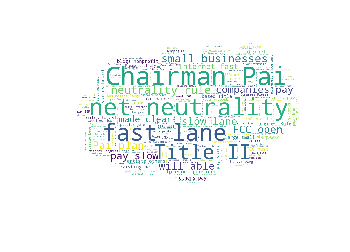

In [32]:
create_wordcloud(words)